Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)
Number of classes: 10


/var/folders/ny/6t80lgd179sbyd1ypw2379bc0000gn/T/ipykernel_2753/1273846194.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y[i])])


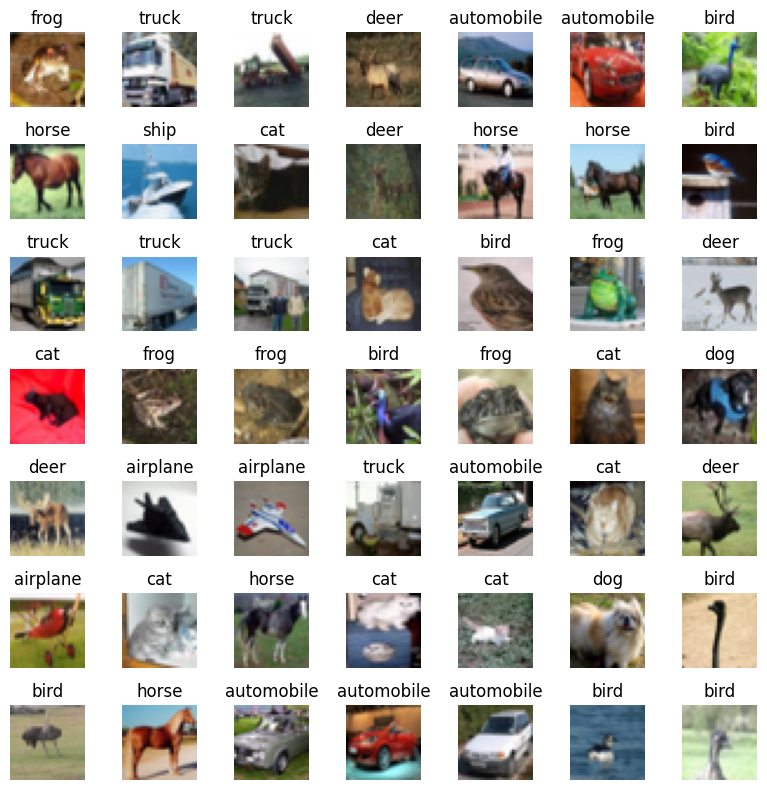

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)
print("Number of classes:", len(class_names))

# Display
def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(8, 8))
    for i in range(49):
        plt.subplot(7, 7, i+1)
        plt.imshow(X[i])
        plt.title(class_names[int(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_sample_images(X_train, y_train, class_names)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.2953 - loss: 1.8703 - val_accuracy: 0.4874 - val_loss: 1.4200
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.5310 - loss: 1.3022 - val_accuracy: 0.5633 - val_loss: 1.2163
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6059 - loss: 1.1082 - val_accuracy: 0.6193 - val_loss: 1.0932
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.6543 - loss: 0.9729 - val_accuracy: 0.6410 - val_loss: 1.0376
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6960 - loss: 0.8750 - val_accuracy: 0.6475 - val_loss: 1.0181
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7141 - loss: 0.8099 - val_accuracy: 0.6487 - val_loss: 0.9915
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7345 - loss: 0.7589 - val_accuracy: 0.6911 - val_loss: 0.9045
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7612 -

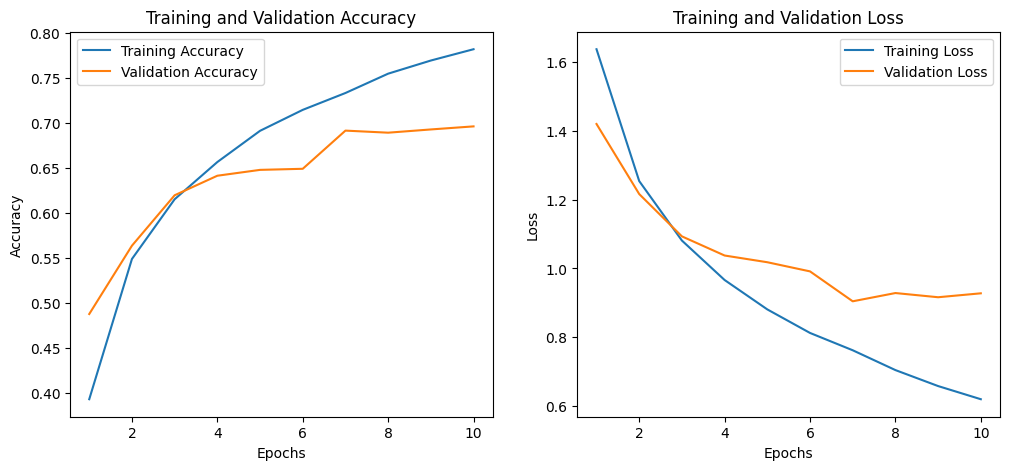

In [22]:

from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

# Build and compile the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model and save the history
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Test Loss: 0.9236282110214233
Test Accuracy: 0.7001000046730042
Test Precision: 0.703265983922306
Test Recall: 0.7001000000000001
Test F1-score: 0.6996787289376087
Classification Report:

              precision    recall  f1-score   support

    airplane       0.76      0.73      0.74      1000
  automobile       0.75      0.88      0.81      1000
        bird       0.64      0.55      0.59      1000
         cat       0.52      0.55      0.53      1000
        deer       0.66      0.61      0.64      1000
         dog       0.57      0.67      0.62      1000
        frog       0.79      0.72      0.75      1000
       horse       0.72      0.75      0.74      1000
        ship       0.78      0.82      0.80      1000
       truck       0.83      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



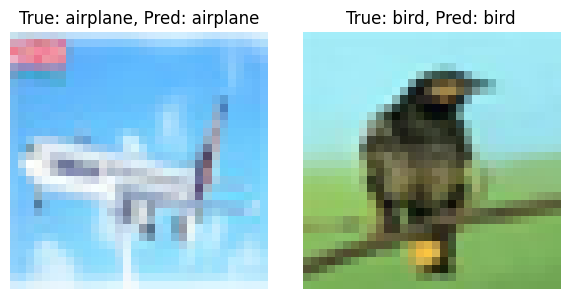

In [23]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# -----------------------------------------------------------
# Evaluate 
test_loss, test_acc = cnn.evaluate(X_test, y_test_cat, verbose=0)

#  class probabilities
y_pred_probs = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Compute additional metrics
test_precision = precision_score(y_test_classes, y_pred_classes, average='macro')
test_recall = recall_score(y_test_classes, y_pred_classes, average='macro')
test_f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

#  metrics
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

# -----------------------------------------------------------
# Classification 
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print("Classification Report:\n")
print(report)

def show_predictions(X, y_true, y_pred, class_names, num_samples=2):
    plt.figure(figsize=(6, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[idx])
        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(X_test, y_test_classes, y_pred_classes, class_names, num_samples=2)


              precision    recall  f1-score   support

    airplane       0.76      0.73      0.74      1000
  automobile       0.75      0.88      0.81      1000
        bird       0.64      0.55      0.59      1000
         cat       0.52      0.55      0.53      1000
        deer       0.66      0.61      0.64      1000
         dog       0.57      0.67      0.62      1000
        frog       0.79      0.72      0.75      1000
       horse       0.72      0.75      0.74      1000
        ship       0.78      0.82      0.80      1000
       truck       0.83      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



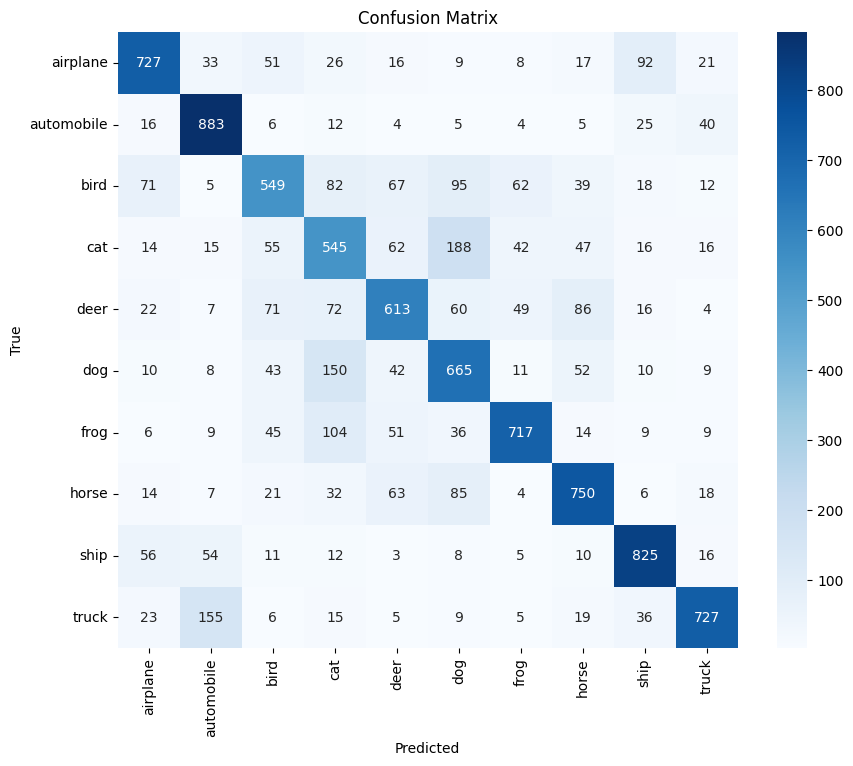

In [25]:
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [26]:
from tensorflow.keras import models, layers, applications
import matplotlib.pyplot as plt

# Pre-trained VGG16 as feature extractor
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False  

# Improved CNN model
cnn_improved = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_improved.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_improved = cnn_improved.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32
)

# # Evaluate on test set
# test_loss, test_acc = cnn_improved.evaluate(X_test, y_test)
# print(f"Improved Model Test Accuracy: {test_acc*100:.2f}%")

# # Plot training history
# def plot_history(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     epochs = range(1, len(acc)+1)

#     plt.figure(figsize=(12,5))
#     # Accuracy
#     plt.subplot(1,2,1)
#     plt.plot(epochs, acc, label='Train Acc')
#     plt.plot(epochs, val_acc, label='Val Acc')
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     # Loss
#     plt.subplot(1,2,2)
#     plt.plot(epochs, loss, label='Train Loss')
#     plt.plot(epochs, val_loss, label='Val Loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

# plot_history(history_improved)


Epoch 1/10
   4/1250 ━━━━━━━━━━━━━━━━━━━━ 2:48 135ms/step - accuracy: 0.1022 - loss: 2.7631

KeyboardInterrupt: 